# Simulação do Modelo de Ising 2D com o Algoritmo de Metrópolis

Neste notebook, simulamos o modelo de Ising bidimensional usando o algoritmo de Monte Carlo via Metrópolis. Nosso objetivo é estudar como as propriedades termodinâmicas do sistema variam com a temperatura, incluindo:
- Energia média
- Magnetização média
- Calor específico
- Susceptibilidade magnética

Além disso, visualizaremos a **dinâmica da evolução do sistema** em diferentes etapas da simulação.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.animation as animation
from IPython.display import HTML

## Inicialização do sistema de spins

In [2]:
def inicializar_rede(L):
    # Rede inicial com spins +1 ou -1 aleatórios
    return np.random.choice([-1, 1], size=(L, L))

## Cálculo da energia total do sistema

In [3]:
def energia_total(rede):
    L = rede.shape[0]
    energia = 0
    for i in range(L):
        for j in range(L):
            S = rede[i, j]
            vizinhos = rede[(i+1)%L, j] + rede[i, (j+1)%L] + \
                       rede[(i-1)%L, j] + rede[i, (j-1)%L]
            energia += -S * vizinhos
    return energia / 2  # cada par contado duas vezes

## Magnetização total

In [4]:
def magnetizacao_total(rede):
    return np.sum(rede)

## Algoritmo de Metrópolis

In [5]:
def passo_metro(rede, T):
    L = rede.shape[0]
    for _ in range(L*L):
        i = np.random.randint(0, L)
        j = np.random.randint(0, L)
        S = rede[i, j]
        vizinhos = rede[(i+1)%L, j] + rede[i, (j+1)%L] + \
                   rede[(i-1)%L, j] + rede[i, (j-1)%L]
        dE = 2 * S * vizinhos
        if dE < 0 or np.random.rand() < np.exp(-dE / T):
            rede[i, j] *= -1
    return rede

## Simulação para várias temperaturas

In [6]:
def simular(L, temps, equil_steps, prod_steps):
    energia_m = []
    mag_m = []
    c_v = []
    susc = []

    for T in tqdm(temps):
        rede = inicializar_rede(L)

        # Equilibração
        for _ in range(equil_steps):
            passo_metro(rede, T)

        energias = []
        magnetizacoes = []
        for _ in range(prod_steps):
            passo_metro(rede, T)
            e = energia_total(rede)
            m = magnetizacao_total(rede)
            energias.append(e)
            magnetizacoes.append(abs(m))

        e_m = np.mean(energias)/(L*L)
        m_m = np.mean(magnetizacoes)/(L*L)
        c = np.var(energias)/(T**2 * L*L)
        x = np.var(magnetizacoes)/(T * L*L)

        energia_m.append(e_m)
        mag_m.append(m_m)
        c_v.append(c)
        susc.append(x)

    return energia_m, mag_m, c_v, susc

## Executando a simulação

In [7]:
L = 20
temps = np.linspace(1.0, 4.0, 31)
energia, magnet, calor_especifico, susc_magn = simular(L, temps, equil_steps=500, prod_steps=1000)

100%|███████████████████████████████████████████| 31/31 [01:46<00:00,  3.43s/it]


## Resultados das grandezas termodinâmicas

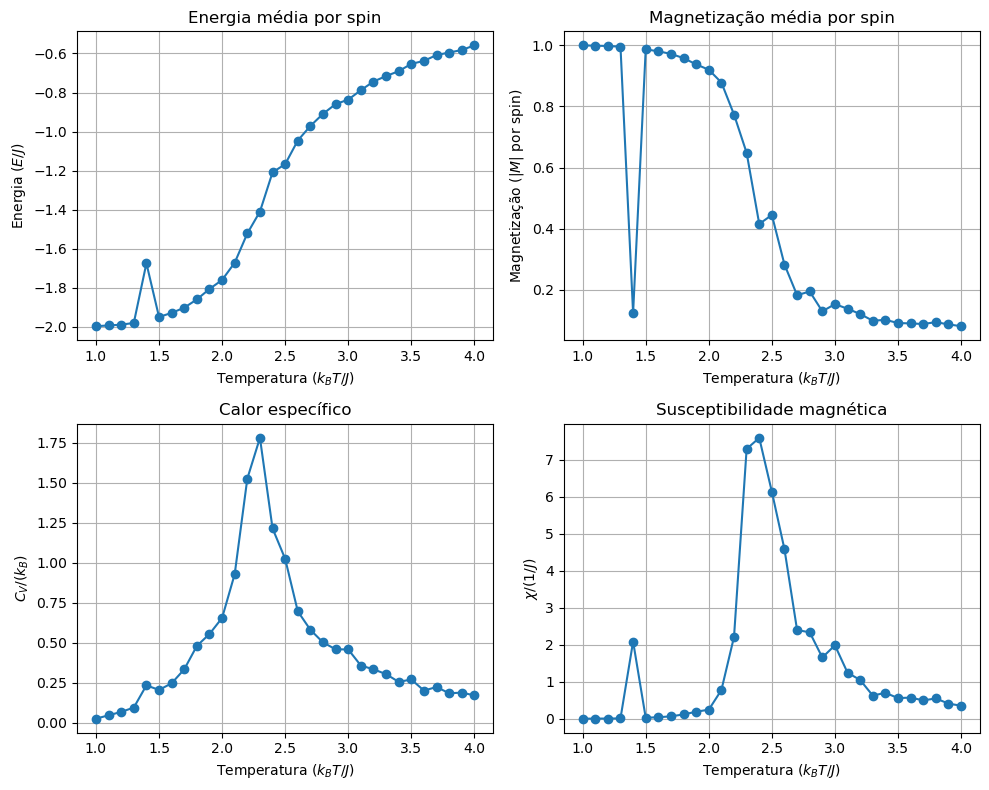

In [15]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(temps, energia, '-o')
plt.title('Energia média por spin')
plt.xlabel('Temperatura ($k_B T / J$)')
plt.ylabel('Energia ($E/J$)')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(temps, magnet, '-o')
plt.title('Magnetização média por spin')
plt.xlabel(r'Temperatura ($k_B T / J$)')
plt.ylabel(r'Magnetização ($|M|$ por spin)')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(temps, calor_especifico, '-o')
plt.title('Calor específico')
plt.xlabel(r'Temperatura ($k_B T / J$)')
plt.ylabel(r'$C_V / (k_B)$')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(temps, susc_magn, '-o')
plt.title('Susceptibilidade magnética')
plt.xlabel(r'Temperatura ($k_B T / J$)')
plt.ylabel(r'$\\chi / (1/J)$')
plt.grid()

plt.tight_layout()
plt.show()


## Dinâmica da evolução do sistema

In [38]:
def animar(L, T, steps):
    rede = inicializar_rede(L)
    fig, ax = plt.subplots()
    img = ax.imshow(rede, cmap='coolwarm', vmin=-1, vmax=1)
    ax.set_title(f"T = {T}")

    def update(frame):
        passo_metro(rede, T)
        img.set_data(rede)
        return [img]

    ani = animation.FuncAnimation(fig, update, frames=steps, blit=True)
    return HTML(ani.to_html5_video())


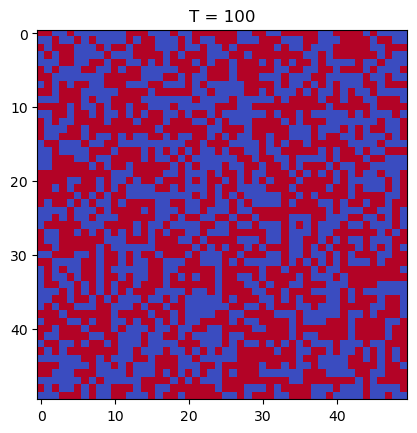

In [39]:
animar(50, 100, 100)